# SVC 是一种用于分类任务的算法，通过在数据中找到一个最优的决策边界（超平面），将不同类别的数据点分开。

In [ ]:
# 导入必要库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             RocCurveDisplay)
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False


In [10]:

# 1. 加载数据集（威斯康星州乳腺癌数据集）
cancer = datasets.load_breast_cancer()
X = cancer.data  # 特征矩阵 (569 samples × 30 features)
y = cancer.target  # 目标变量 (0=恶性, 1=良性)
feature_names = cancer.feature_names
target_names = cancer.target_names

# 查看数据概况
print("特征示例:\n", feature_names[:5])
print("类别分布:", {n: v for n, v in zip(target_names, np.bincount(y))})


特征示例:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
类别分布: {'malignant': 212, 'benign': 357}


In [11]:

# 2. 数据预处理
# 标准化（SVM对特征尺度敏感）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)



In [7]:

# 4. 训练SVC模型
svc_model = SVC(
    kernel='rbf',          # 高斯核函数
    C=1.0,                # 正则化参数
    gamma='scale',        # 核系数（默认1/(n_features * X.var())）
    probability=True,     # 启用概率预测
    random_state=42
)
svc_model.fit(X_train, y_train)



SVC(probability=True, random_state=42)

In [12]:
# 5. 模型评估
y_pred = svc_model.predict(X_test)
y_proba = svc_model.predict_proba(X_test)[:, 1]  # 预测恶性概率

print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))



分类报告:
              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



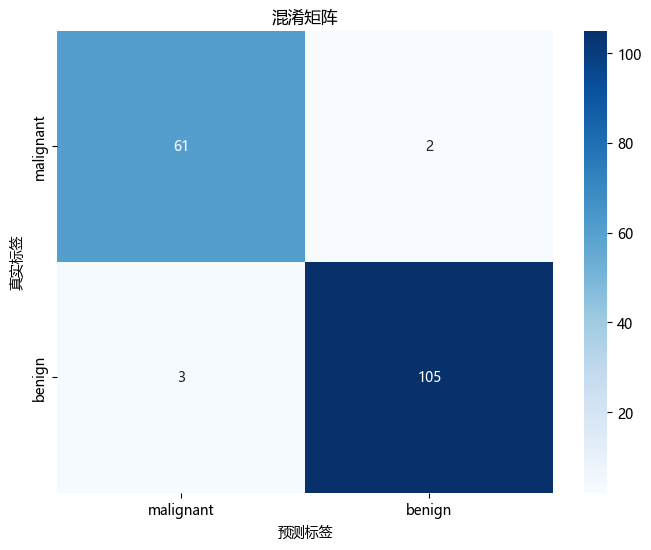


新样本预测结果: malignant
恶性概率: 0.8222475635328366


In [14]:

# 6. 可视化结果
# 混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()

# 8. 预测新样本（模拟）
new_sample = np.array([[15.0, 20.0, 100.0, 700.0, 0.1, 
                        0.2, 0.3, 0.4, 0.5, 0.6,
                        1.0, 2.0, 3.0, 30.0, 0.01,
                        0.02, 0.03, 0.04, 0.05, 0.06,
                        0.1, 0.2, 0.3, 0.4, 0.5,
                        0.6, 0.7, 0.8, 0.9, 1.0]])
new_sample_scaled = scaler.transform(new_sample)
print("\n新样本预测结果:", target_names[svc_model.predict(new_sample_scaled)[0]])
print("恶性概率:", svc_model.predict_proba(new_sample_scaled)[0, 0])